# Assignment 4
Customer Segmentation Analysis 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Loading the dataset

In [4]:
df = pd.read_csv('C:/Users/Asus/Downloads/Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# Visualisation
Univariate analysis

In [5]:
df['Age'].mean()

38.85

In [6]:
df['Age'].median()

36.0

In [7]:
df['Age'].std()

13.969007331558883

In [8]:
df['Annual Income (k$)'].value_counts()

54     12
78     12
60      6
87      6
62      6
       ..
61      2
126     2
59      2
58      2
15      2
Name: Annual Income (k$), Length: 64, dtype: int64

<AxesSubplot:>

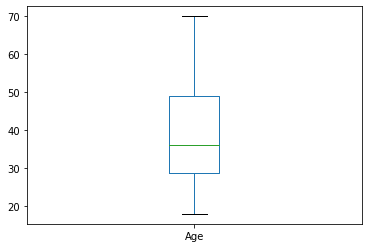

In [9]:
df.boxplot(column=['Age'], grid=False)

(array([24., 22., 28., 38., 30., 36.,  8.,  6.,  4.,  4.]),
 array([ 15. ,  27.2,  39.4,  51.6,  63.8,  76. ,  88.2, 100.4, 112.6,
        124.8, 137. ]),
 <BarContainer object of 10 artists>)

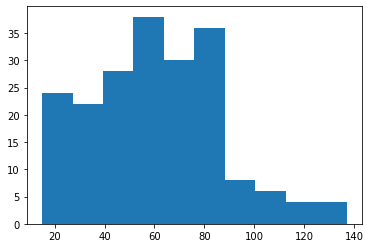

In [10]:
plt.hist(df['Annual Income (k$)'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

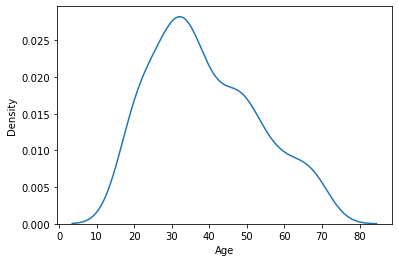

In [11]:
sns.kdeplot(df['Age'])


# Bivariate


Text(0, 0.5, 'Age')

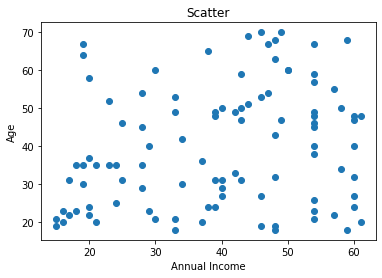

In [12]:
plt.scatter(x=df["Annual Income (k$)"].head(100), y=df.Age.head(100))
plt.title('Scatter')
plt.xlabel('Annual Income')
plt.ylabel('Age')

<BarContainer object of 5 artists>

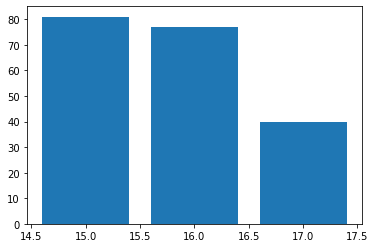

In [13]:
plt.bar(df['Annual Income (k$)'].head() ,df['Spending Score (1-100)'].head(),  )

# Multivariate

<AxesSubplot:>

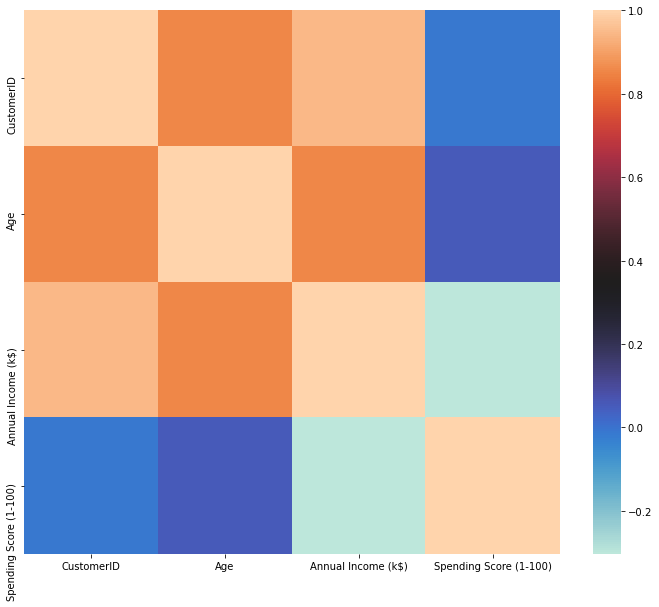

In [20]:
f = plt.subplots(figsize=(12,10))
sns.heatmap(df.head().corr(), cmap="icefire")

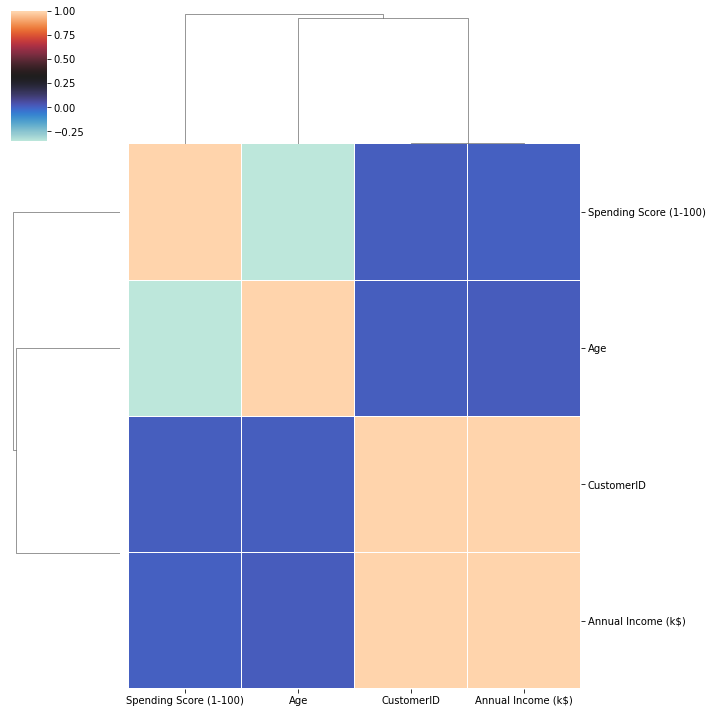

In [23]:
corrmat = df.corr(method='spearman')
cg = sns.clustermap(corrmat, cmap="icefire", linewidths=0.1);
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation=0)
cg

# Perform descriptive statistics on the dataset

In [24]:
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [25]:
df.dtypes

CustomerID                 int64
Genre                     object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [26]:
df.nunique()

CustomerID                200
Genre                       2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [28]:
quantile = df['Age'].quantile(q=[0.75, 0.25])
quantile

0.75    49.00
0.25    28.75
Name: Age, dtype: float64

# Handling the missing data

In [29]:
df.isnull().sum()

CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [30]:
df.isna().any()

CustomerID                False
Genre                     False
Age                       False
Annual Income (k$)        False
Spending Score (1-100)    False
dtype: bool

# Find the outliers and replace the outliers 

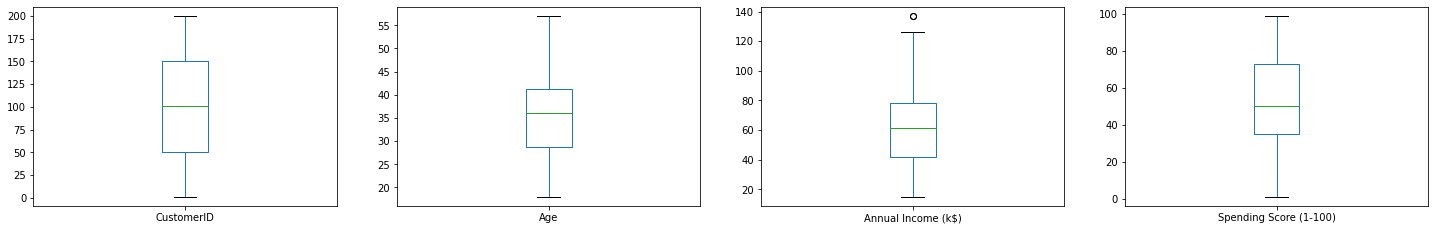

In [33]:
df.plot(kind="box",subplots=True,layout=(7,4),figsize=(25,30));

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

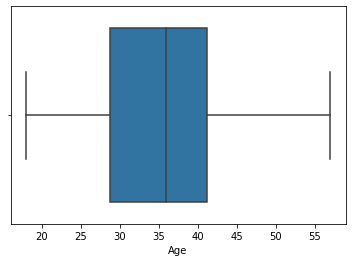

In [35]:
sns.boxplot(df['Age'])

In [36]:
df['Age']=np.where(df['Age']>57,39, df['Age'])

C:\Users\Asus\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

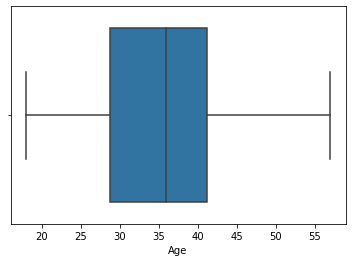

In [37]:
sns.boxplot(df['Age'])

# Check for Categorical columns and perform encoding.

In [41]:
pd.Categorical(df["Annual Income (k$)"])

[15, 15, 16, 16, 17, ..., 120, 126, 126, 137, 137]
Length: 200
Categories (64, int64): [15, 16, 17, 18, ..., 113, 120, 126, 137]

In [42]:
pd.get_dummies(df["Annual Income (k$)"]).head(10)

,15,16,17,18,19,20,21,23,24,25,...,93,97,98,99,101,103,113,120,126,137
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [43]:
pd.get_dummies(df).head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Genre_Female,Genre_Male
0,1,19,15,39,0,1
1,2,21,15,81,0,1
2,3,20,16,6,1,0
3,4,23,16,77,1,0
4,5,31,17,40,1,0
5,6,22,17,76,1,0
6,7,35,18,6,1,0
7,8,23,18,94,1,0
8,9,39,19,3,0,1
9,10,30,19,72,1,0


# Scaling the data

In [44]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [46]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [49]:
label = LabelEncoder()
label = label.fit_transform(df["Genre"])
df["Genre"] = label
df['Genre'].value_counts()

X = df.drop("Age",axis=1)
Y = df['Age']

In [50]:
object1 = StandardScaler()
scale = object1.fit_transform(X) 
scale

array([[-1.7234121 ,  1.12815215, -1.73899919, -0.43480148],
       [-1.70609137,  1.12815215, -1.73899919,  1.19570407],
       [-1.68877065, -0.88640526, -1.70082976, -1.71591298],
       [-1.67144992, -0.88640526, -1.70082976,  1.04041783],
       [-1.6541292 , -0.88640526, -1.66266033, -0.39597992],
       [-1.63680847, -0.88640526, -1.66266033,  1.00159627],
       [-1.61948775, -0.88640526, -1.62449091, -1.71591298],
       [-1.60216702, -0.88640526, -1.62449091,  1.70038436],
       [-1.5848463 ,  1.12815215, -1.58632148, -1.83237767],
       [-1.56752558, -0.88640526, -1.58632148,  0.84631002],
       [-1.55020485,  1.12815215, -1.58632148, -1.4053405 ],
       [-1.53288413, -0.88640526, -1.58632148,  1.89449216],
       [-1.5155634 , -0.88640526, -1.54815205, -1.36651894],
       [-1.49824268, -0.88640526, -1.54815205,  1.04041783],
       [-1.48092195,  1.12815215, -1.54815205, -1.44416206],
       [-1.46360123,  1.12815215, -1.54815205,  1.11806095],
       [-1.4462805 , -0.

# Perform any of the clustering algorithms

In [51]:
from sklearn.cluster import KMeans

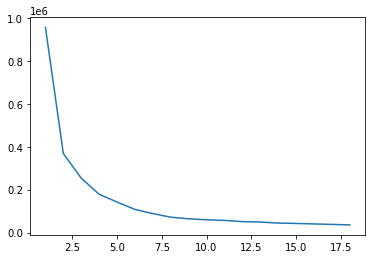

In [53]:
wcss = []
for i in range(1,19):
    m = KMeans(n_clusters=i , max_iter=300)
    m.fit(df)  
    wcss.append(m.inertia_)
plt.plot(list(range(1,19)),wcss)
plt.show()

In [62]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(X)

print(Y)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 0 3 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 0 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 2 4 2 4 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2
 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


In [66]:
kmeans.labels_

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [67]:
mb=pd.Series(kmeans.labels_)

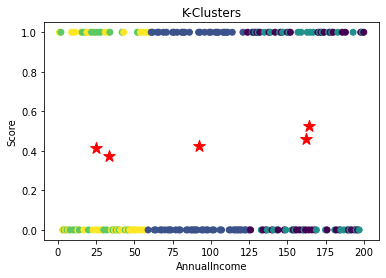

In [68]:
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=y_pred)
plt.scatter(centroid[:,0],centroid[:,1],marker='*',color='red',s=150)
plt.xlabel('AnnualIncome')
plt.ylabel('Score')
plt.title('K-Clusters')
plt.show()

# Add the cluster data with the primary dataset

In [70]:
df['cluster']=mb

In [71]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),clust,cluster
0,1,1,19,15,39,3,3
1,2,1,21,15,81,0,0
2,3,0,20,16,6,3,3
3,4,0,23,16,77,0,0
4,5,0,31,17,40,3,3


# Split the data into dependent and independent variables.

In [72]:
y=df['clust'].values
y

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

In [74]:
x=df.drop(columns=['clust','CustomerID'],axis=1).values
x

array([[  1,  19,  15,  39,   3],
       [  1,  21,  15,  81,   0],
       [  0,  20,  16,   6,   3],
       [  0,  23,  16,  77,   0],
       [  0,  31,  17,  40,   3],
       [  0,  22,  17,  76,   0],
       [  0,  35,  18,   6,   3],
       [  0,  23,  18,  94,   0],
       [  1,  39,  19,   3,   3],
       [  0,  30,  19,  72,   0],
       [  1,  39,  19,  14,   3],
       [  0,  35,  19,  99,   0],
       [  0,  39,  20,  15,   3],
       [  0,  24,  20,  77,   0],
       [  1,  37,  20,  13,   3],
       [  1,  22,  20,  79,   0],
       [  0,  35,  21,  35,   3],
       [  1,  20,  21,  66,   0],
       [  1,  52,  23,  29,   3],
       [  0,  35,  23,  98,   0],
       [  1,  35,  24,  35,   3],
       [  1,  25,  24,  73,   0],
       [  0,  46,  25,   5,   3],
       [  1,  31,  25,  73,   0],
       [  0,  54,  28,  14,   3],
       [  1,  29,  28,  82,   0],
       [  0,  45,  28,  32,   3],
       [  1,  35,  28,  61,   0],
       [  0,  40,  29,  31,   3],
       [  0,  

# Build the Model

In [77]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

# Train the Model

In [80]:
rf.fit(X_train,y_train)

RandomForestClassifier()

#  Test the Model

In [82]:
pred=rf.predict(X_test)

pred

array([4, 0, 3, 1, 1, 4, 4, 1, 1, 0, 4, 1, 2, 4, 1, 2, 0, 1, 4, 4, 4, 3,
       1, 4, 4, 0, 4, 4, 2, 1, 0, 3, 0, 4, 1, 4, 2, 2, 1, 4])

# Measure the performance using Evaluation Metrics

In [85]:
from sklearn.metrics import accuracy_score,classification_report

accuracy_score(y_test,pred)

0.975

In [87]:
from sklearn import metrics
metrics.confusion_matrix(y_test,pred)

array([[ 6,  0,  0,  0,  1],
       [ 0, 11,  0,  0,  0],
       [ 0,  0,  5,  0,  0],
       [ 0,  0,  0,  3,  0],
       [ 0,  0,  0,  0, 14]], dtype=int64)